In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Shape 확인
print('Reshape 이전 : ',x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
print('Reshape 이후 : ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('One-Hot Encoding : ',y_train.shape, y_test.shape)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]
print('Train / Validation 분리 : ', x_val.shape, x_train.shape, y_val.shape, y_train.shape)


Reshape 이전 :  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Reshape 이후 :  (60000, 784) (60000,) (10000, 784) (10000,)
One-Hot Encoding :  (60000, 10) (10000, 10)
Train / Validation 분리 :  (42000, 784) (18000, 784) (42000, 10) (18000, 10)


In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 134us/step - loss: 1.1306 - acc: 0.7261 - val_loss: 0.6541 - val_acc: 0.8380
Epoch 2/5
18000/18000 [==============================] - 2s 124us/step - loss: 0.5200 - acc: 0.8683 - val_loss: 0.4857 - val_acc: 0.8699
Epoch 3/5
18000/18000 [==============================] - 2s 122us/step - loss: 0.4177 - acc: 0.8859 - val_loss: 0.4175 - val_acc: 0.8838
Epoch 4/5
18000/18000 [==============================] - 2s 123us/step - loss: 0.3706 - acc: 0.8973 - val_loss: 0.3862 - val_acc: 0.8904
Epoch 5/5
18000/18000 [==============================] - 2s 123us/step - loss: 0.3424 - acc: 0.9039 - val_loss: 0.3679 - val_acc: 0.8962


In [6]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 24us/step

loss_and_metrics : [0.34018011765480044, 0.9038]


In [44]:
# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)
yhat_predict = model.predict(xhat).astype(np.float64)
for i in range(len(xhat)):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    print('Predict_array : {}'.format(np.around(yhat_predict[i], decimals = 3)))
    print('*'*100)

True : 0, Predict : 0
Predict_array : [0.998 0.    0.    0.    0.    0.001 0.001 0.    0.    0.   ]
****************************************************************************************************
True : 4, Predict : 4
Predict_array : [0.    0.    0.    0.    0.927 0.001 0.001 0.004 0.005 0.061]
****************************************************************************************************
True : 5, Predict : 5
Predict_array : [0.008 0.    0.    0.001 0.    0.967 0.    0.004 0.017 0.003]
****************************************************************************************************
True : 2, Predict : 2
Predict_array : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
****************************************************************************************************
True : 2, Predict : 2
Predict_array : [0.    0.    0.996 0.    0.    0.    0.    0.    0.002 0.   ]
****************************************************************************************************
True : 9, Predict : 9
Pre

# Keras 모델 저장하기

In [8]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

# 모델 아키텍쳐 확인하기

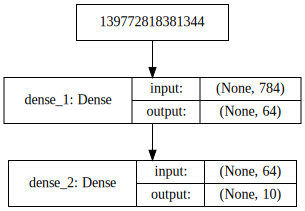

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 에러가 날경우 sudo apt-get install graphviz 를 실행한다.ㄴ

# 모델을 아키텍쳐와 Weight으로 분리해서 저장하기

In [10]:
# json 방식
from keras.models import model_from_json
json_string = model.to_json() # 모델 아키텍처를 json 형식으로 저장
model = model_from_json(json_string) # json 파일에서 모델 아키텍처 재구성
print('Model Architecture : {}'.format(json_string))

Model Architecture : {"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "ker

In [11]:
# yaml 방식
from keras.models import model_from_yaml
yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장
model = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성
print('Model Architecture : {}'.format(yaml_string))

Model Architecture : backend: tensorflow
class_name: Sequential
config:
- class_name: Dense
  config:
    activation: relu
    activity_regularizer: null
    batch_input_shape: !!python/tuple [null, 784]
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    dtype: float32
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    name: dense_1
    trainable: true
    units: 64
    use_bias: true
- class_name: Dense
  config:
    activation: softmax
    activity_regularizer: null
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    n

# Weight만 따로 저장하기

In [12]:
model.save_weights('keras_model_weight_save') 